In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

Text(0.5, 1.0, 'bino')

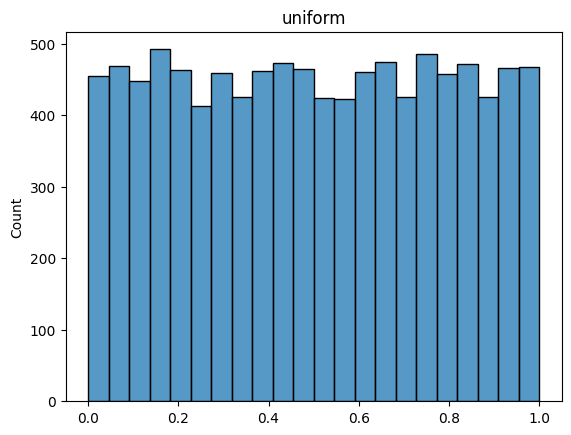

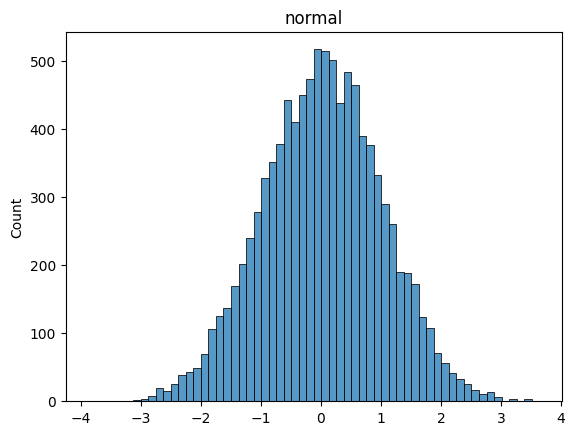

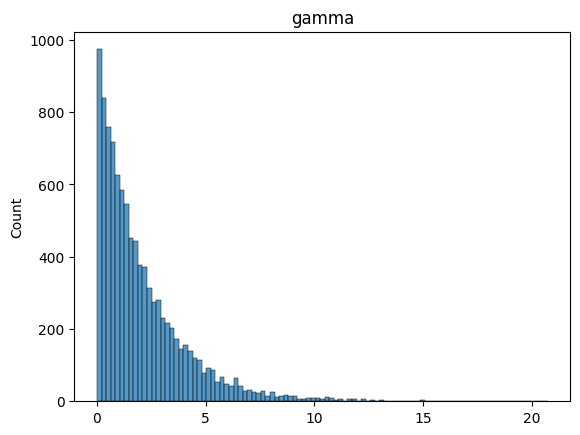

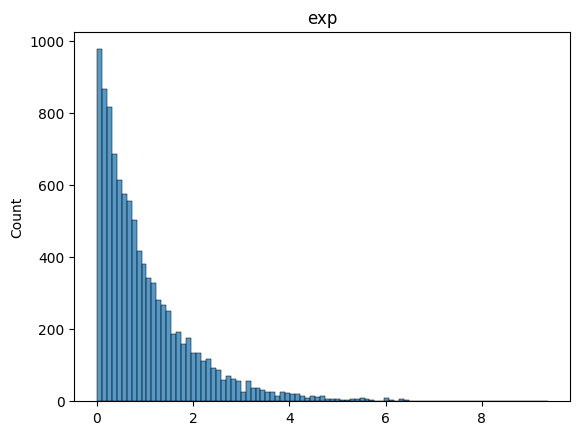

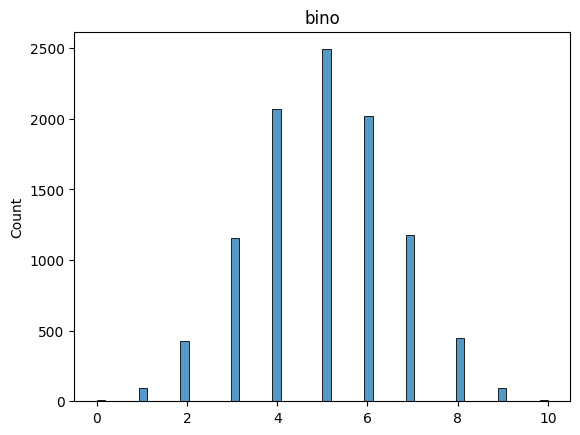

In [ ]:
uniform=np.random.uniform(0,1,10000)
sns.histplot(uniform)
plt.title('uniform')
plt.figure()
normal=np.random.normal(0,1,10000)
sns.histplot(normal)
plt.title('normal')
gamma=np.random.gamma(1,2,10000)
plt.figure()
sns.histplot(gamma)
plt.title('gamma')
exp=np.random.exponential(1,10000)
plt.figure()
sns.histplot(exp)
plt.title('exp')
bino=np.random.binomial(10,0.5,10000)
plt.figure()
sns.histplot(bino)
plt.title('bino')

Text(0.5, 1.0, 'binomial')

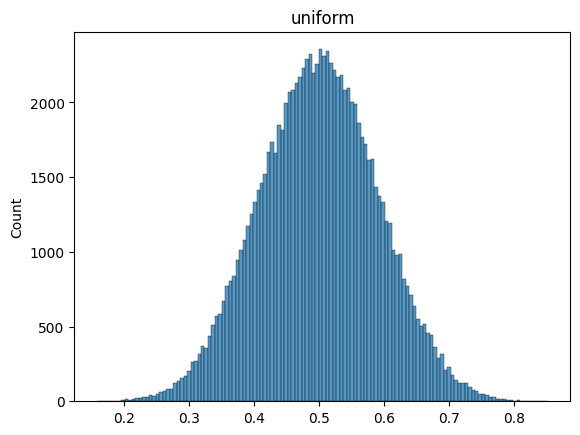

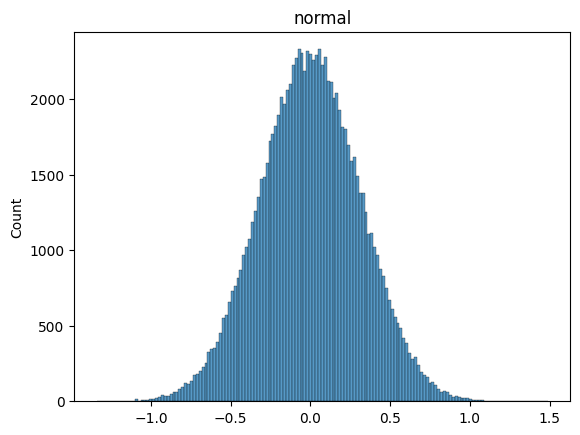

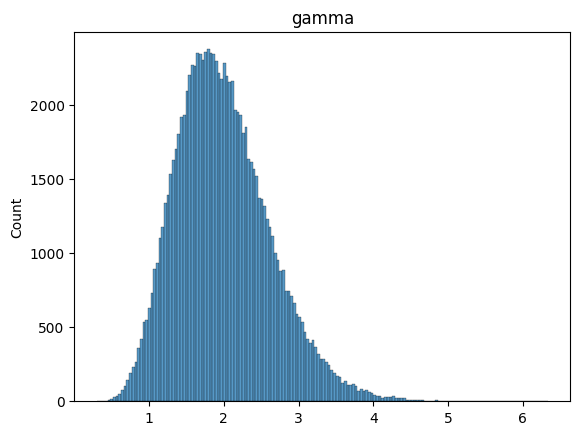

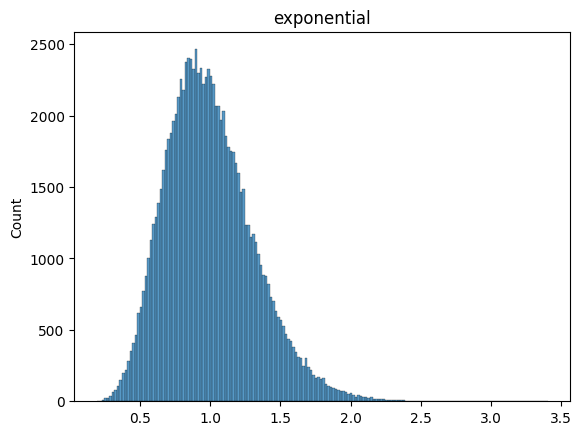

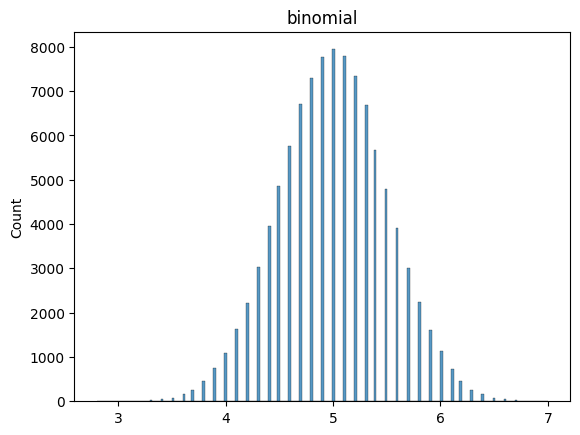

In [ ]:
uniform=np.zeros([10,100000])
for i in range(10):
  uniform[i,:]=np.random.uniform(0,1,100000)
u=np.mean(uniform,axis=0)
plt.figure()
sns.histplot(u)
plt.title('uniform')

uniform=np.zeros([10,100000])
for i in range(10):
  uniform[i,:]=np.random.normal(0,1,100000)
u=np.mean(uniform,axis=0)
plt.figure()
sns.histplot(u)
plt.title('normal')

uniform=np.zeros([10,100000])
for i in range(10):
  uniform[i,:]=np.random.gamma(1,2,100000)
u=np.mean(uniform,axis=0)
plt.figure()
sns.histplot(u)
plt.title('gamma')

uniform=np.zeros([10,100000])
for i in range(10):
  uniform[i,:]=np.random.exponential(1,100000)
u=np.mean(uniform,axis=0)
plt.figure()
sns.histplot(u)

plt.title('exponential')

uniform=np.zeros([10,100000])
for i in range(10):
  uniform[i,:]=np.random.binomial(10,0.5,100000)
u=np.mean(uniform,axis=0)
plt.figure()
sns.histplot(u)
plt.title('binomial')



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
df=pd.read_csv("/content/gdrive/MyDrive/prob10.csv")

Mounted at /content/gdrive/


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:

for i in df.columns:
  print(i+': ')
  print(df[i].unique())

symboling: 
[ 3  1  2  0 -1 -2]
normalized-losses: 
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type: 
['gas' 'diesel']
aspiration: 
['std' 'turbo']
num-of-doors: 
['two' 'four' '?']
body-style: 
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels: 
['rwd' 'fwd' '4wd']
engine-location: 
['front' 'rear']
wheel-base: 
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [ ]:
#replace ? to nan values
df = df.replace({'?':np.nan,'NaN':np.nan,None:np.nan})
#df.fillna('NaN',inplace=True)
#drop a row if it hasnt have at least 15 not nun values
df=df.dropna(axis=0,thresh=15)
column_to_convert=['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
#convert numerical values which have object type to float
df[column_to_convert]=df[column_to_convert].astype('float32')
df[['num-of-doors','num-of-cylinders']]=df[['num-of-doors','num-of-cylinders']].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df[['num-of-doors','num-of-cylinders']]=df[['num-of-doors','num-of-cylinders']].astype('float32')
#fill nun values with interpolate
df=df.interpolate()
df['normalized-losses']=df['normalized-losses'].interpolate()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  202 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    float32
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    float32
 16  engine-size        205 non

In [ ]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,202.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,127.148514,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.327902,3.255707,10.142537,105.180489,5129.024414,25.219512,30.751220,13247.707031
std,1.245307,35.252052,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.271336,0.313694,3.972040,40.712921,478.476410,6.542142,6.886443,7926.126953
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,123.599998,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,154.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


from matplotlib import pyplot as plt
_df_0['symboling'].plot(kind='hist', bins=20, title='symboling')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['normalized-losses'].plot(kind='hist', bins=20, title='normalized-losses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num-of-doors'].plot(kind='hist', bins=20, title='num-of-doors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['wheel-base'].plot(kind='hist', bins=20, title='wheel-base')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='symboling', y='normalized-losses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='normalized-losses', y='num-of-doors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='num-of-doors', y='wheel-base', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='wheel-base', y='length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['symboling'].plot(kind='line', figsize=(8, 4), title='symboling')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['normalized-losses'].plot(kind='line', figsize=(8, 4), title='normalized-losses')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['num-of-doors'].plot(kind='line', figsize=(8, 4), title='num-of-doors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['wheel-base'].plot(kind='line', figsize=(8, 4), title='wheel-base')
plt.gca().spines[['top', 'right']].set_visible(False)

|index|symboling|normalized-losses|num-of-doors|wheel-base|length|width|height|curb-weight|num-of-cylinders|engine-size|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|std|1\.2453068281055297|35\.252052307128906|0\.9937153458595276|6\.021775685025571|12\.33728852655518|2\.145203852687183|2\.4435219699049036|520\.6802035016387|1\.0808537006378174|41\.64269343817984|0\.27133578062057495|0\.3136935532093048|3\.972040321863298|40\.712921142578125|478\.4764099121094|6\.542141653001622|6\.886443130941824|7926\.126953125|
|min|-2\.0|65\.0|2\.0|86\.6|141\.1|60\.3|47\.8|1488\.0|2\.0|61\.0|2\.5399999618530273|2\.069999933242798|7\.0|48\.0|4150\.0|13\.0|16\.0|5118\.0|
|25%|0\.0|101\.0|2\.0|94\.5|166\.3|64\.1|52\.0|2145\.0|4\.0|97\.0|3\.1500000953674316|3\.109999895095825|8\.6|70\.0|4800\.0|19\.0|25\.0|7788\.0|
|mean|0\.8341463414634146|127\.14851379394531|3\.1317074298858643|98\.75658536585367|174\.04926829268288|65\.90780487804878|53\.72487804878049|2555\.5658536585365|4\.38048791885376|126\.90731707317073|3\.327902317047119|3\.255707263946533|10\.142536585365855|105\.18048858642578|5129\.0244140625|25\.21951219512195|30\.75121951219512|13247\.70703125|
|50%|1\.0|123\.5999984741211|4\.0|97\.0|173\.2|65\.5|54\.1|2414\.0|4\.0|120\.0|3\.309999942779541|3\.2899999618530273|9\.0|95\.0|5200\.0|24\.0|30\.0|10295\.0|
|75%|2\.0|154\.0|4\.0|102\.4|183\.1|66\.9|55\.5|2935\.0|4\.0|141\.0|3\.5799999237060547|3\.4100000858306885|9\.4|120\.0|5500\.0|30\.0|34\.0|16503\.0|
|max|3\.0|256\.0|4\.0|120\.9|208\.1|72\.3|59\.8|4066\.0|12\.0|326\.0|3\.940000057220459|4\.170000076293945|23\.0|288\.0|6600\.0|49\.0|54\.0|45400\.0|
|count|205\.0|202\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|205\.0|


<Axes: >

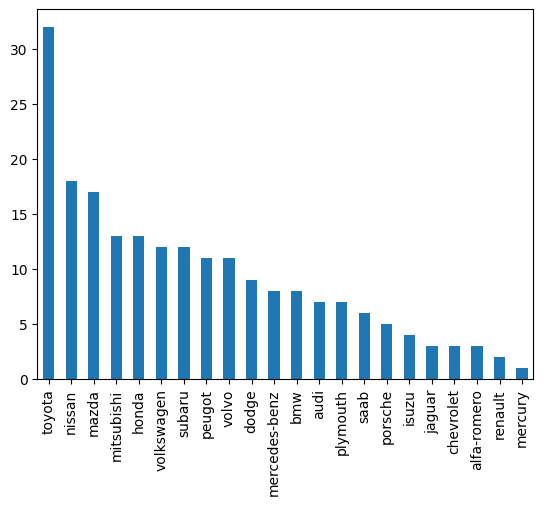

In [ ]:
c=df['make'].value_counts()
c.plot(kind='bar')

In [ ]:
import scipy.stats as stats
cloumn_count=(['symboling', 'normalized-losses','num-of-doors','wheel-base', 'length', 'width', 'height', 'curb-weight','num-of-cylinders', 'engine-size', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price'])
df2=df[cloumn_count]
std_deviation=np.std(df2)
skewness=stats.skew(df2.iloc[3:,:])
kur=stats.kurtosis(df2.iloc[3:,:])


In [ ]:
kur

array([-6.60115054e-01,  1.16360828e-02, -1.90978348e+00,  9.81813657e-01,
       -1.43979333e-01,  6.17657497e-01, -4.62300156e-01, -1.00164956e-01,
        1.35350231e+01,  5.08647449e+00, -8.73536553e-01,  2.31190494e+00,
        4.93480022e+00,  2.32173989e+00, -1.83305317e-02,  5.09995406e-01,
        3.65973506e-01,  3.00563020e+00])

Text(0, 0.5, 'price')

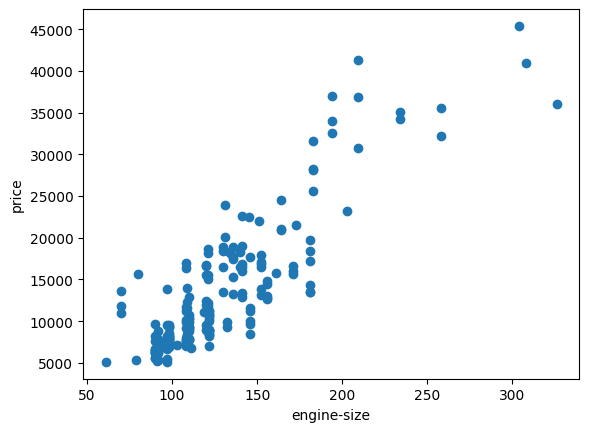

In [ ]:
plt.scatter(df['engine-size'],df['price'])
plt.xlabel('engine-size')
plt.ylabel('price')

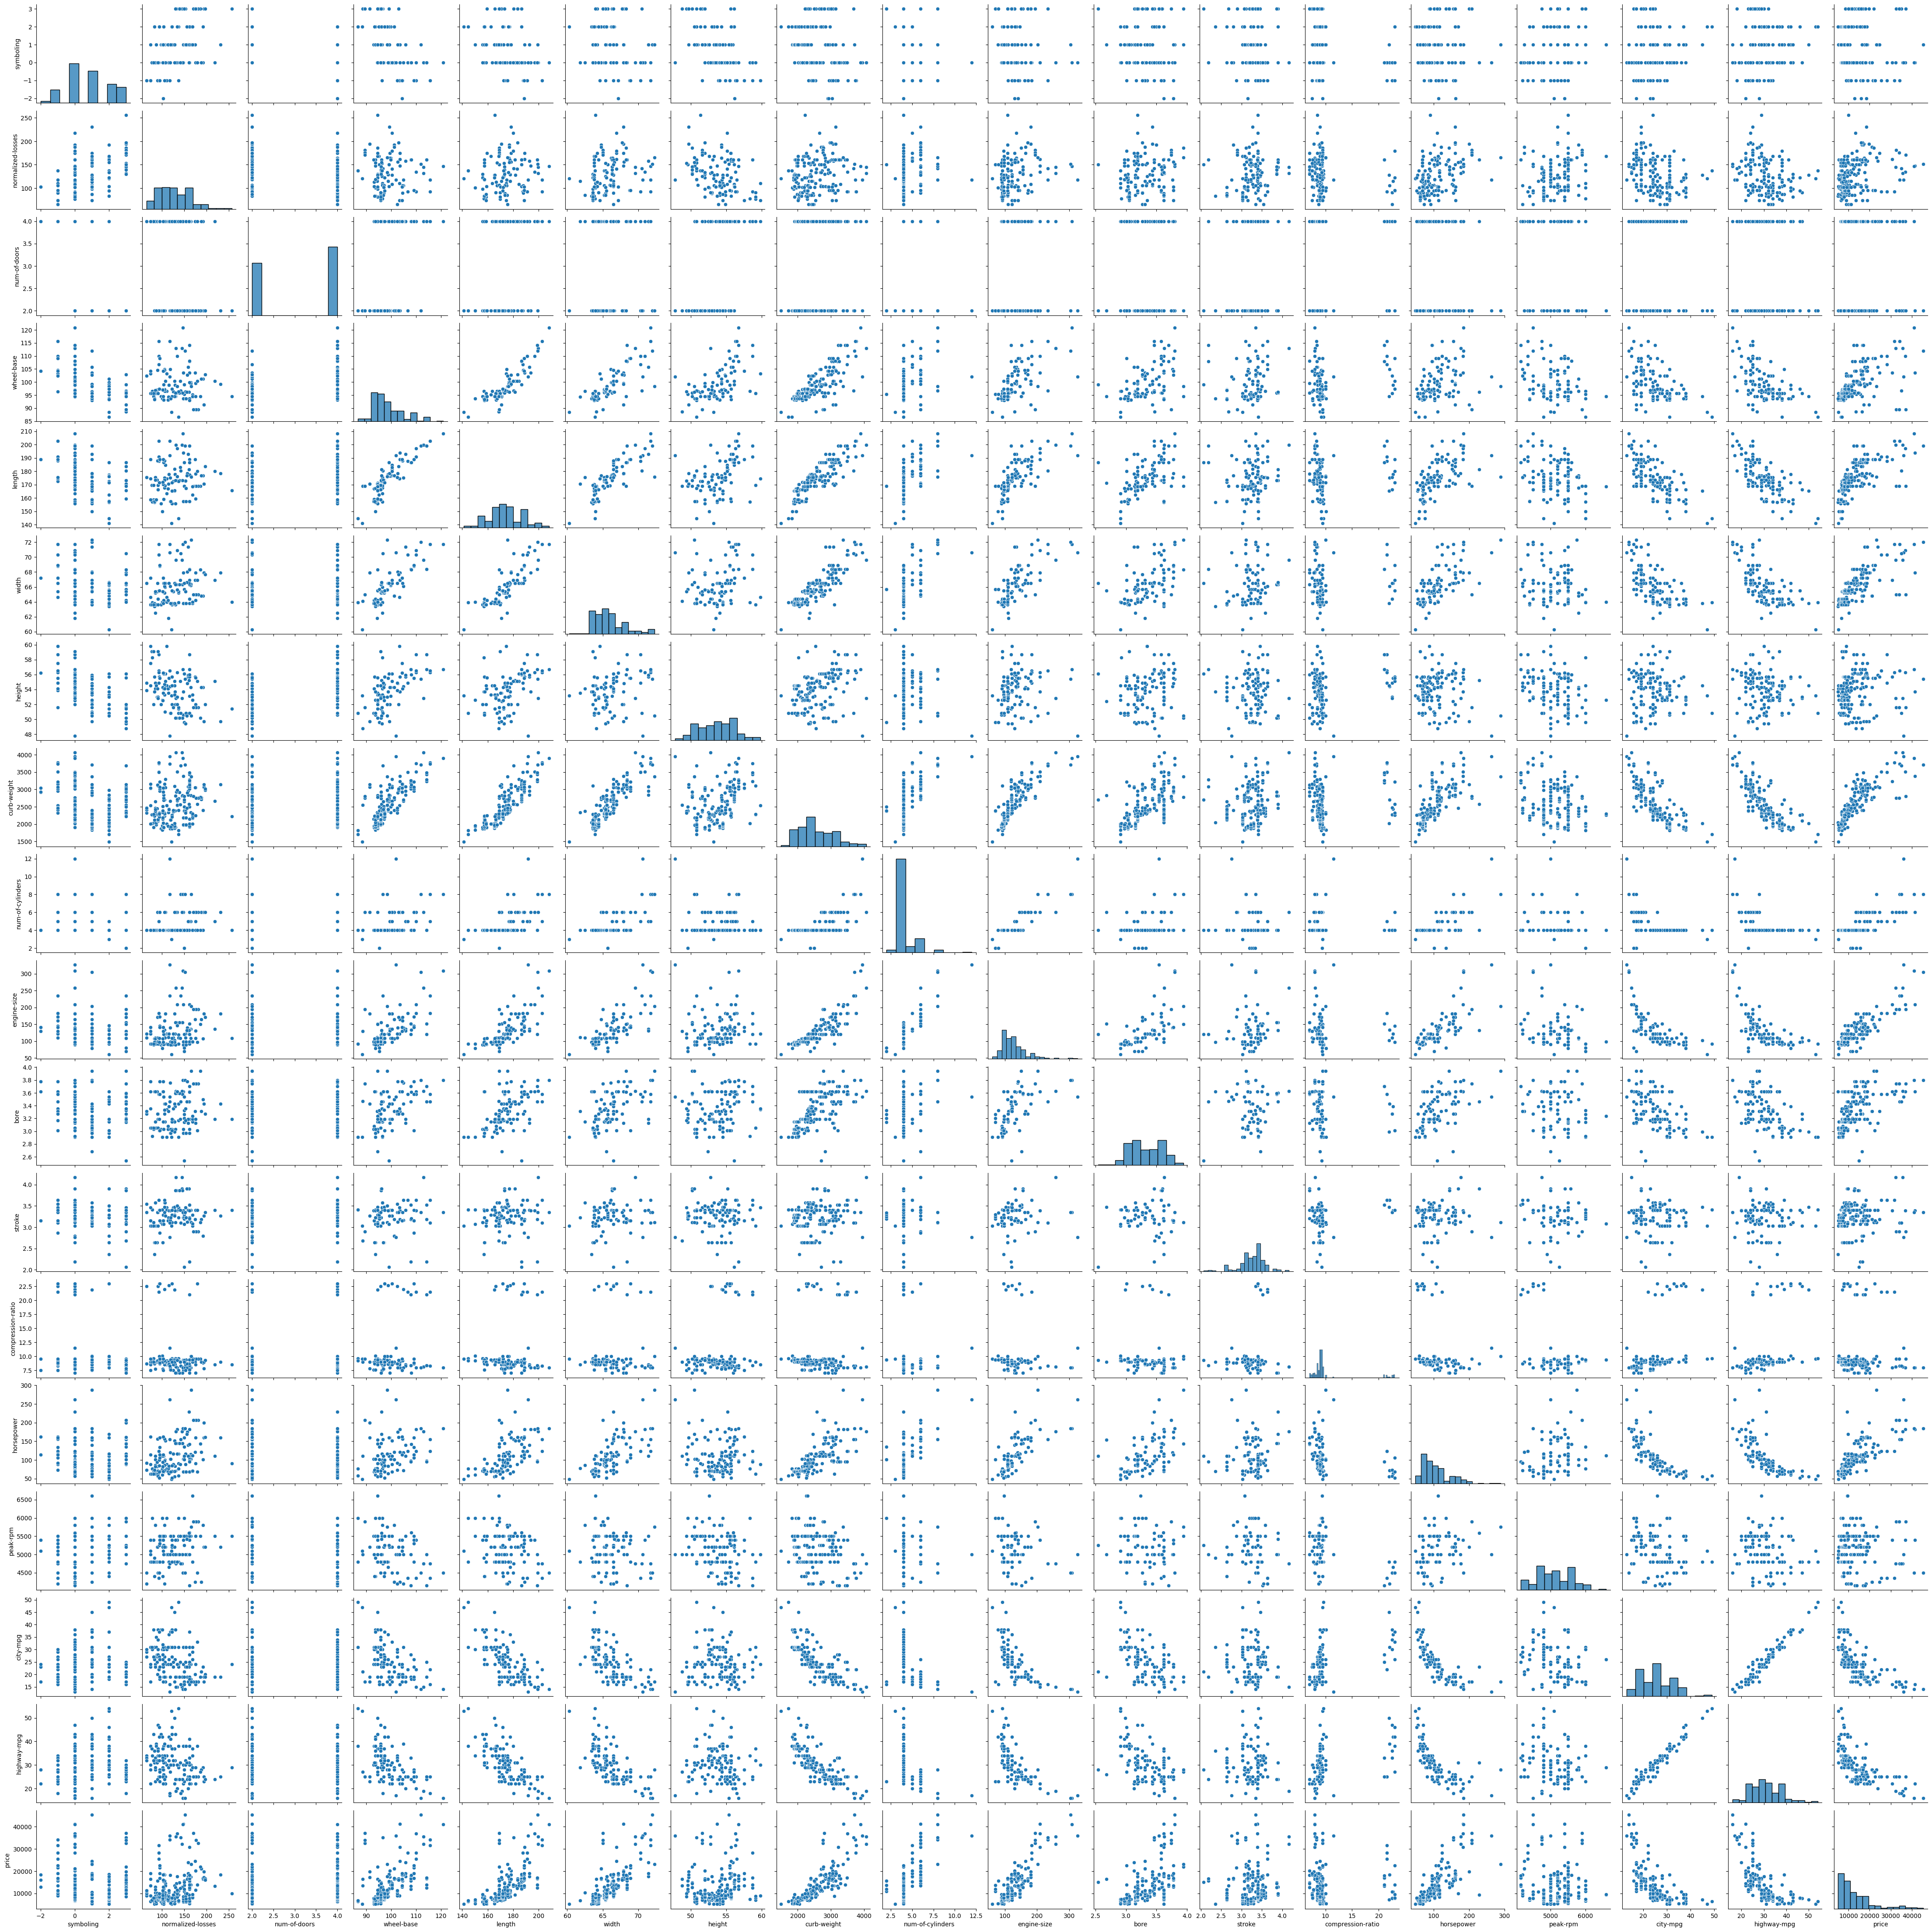

In [ ]:
sns.pairplot(df)

<ipython-input-52-00928714465c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlGn")


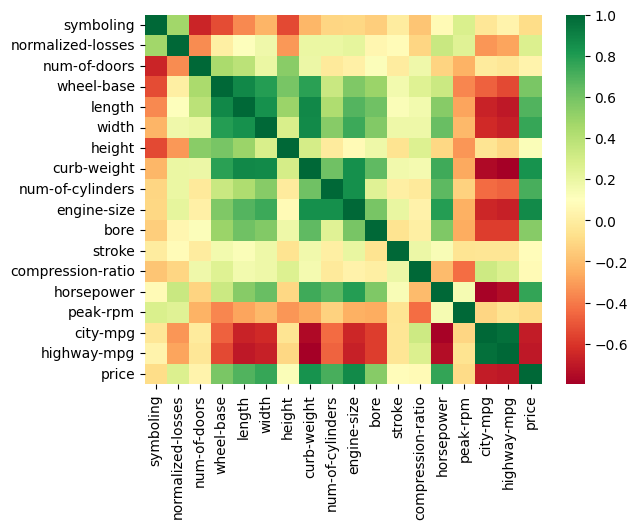

In [ ]:
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

<Axes: xlabel='engine-location', ylabel='price'>

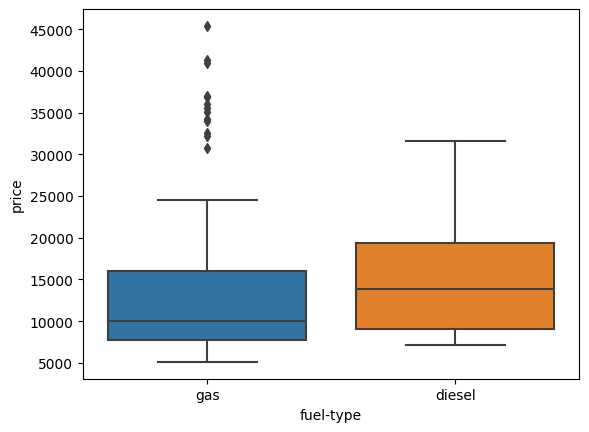

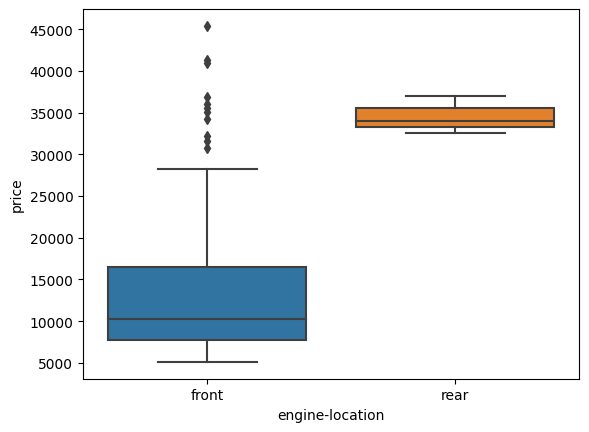

In [ ]:

sns.boxplot(x=df['fuel-type'],y=df['price'])
plt.figure()
sns.boxplot(x=df['engine-location'],y=df['price'])